In [1]:
import torch
from dataloaders.beat import CustomDataset
from dataloaders.build_vocab import Vocab
import pickle
import numpy as np

config_file = open("camn_config.obj", 'rb') 
args = pickle.load(config_file)
args.batch_size = 16

mean_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_mean.npy"))
std_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_std.npy"))
mean_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_mean.npy"))
std_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_std.npy"))

In [106]:
train_data = CustomDataset(args, "train")
train_loader = torch.utils.data.DataLoader(
    train_data, 
    batch_size=args.batch_size,  
    shuffle=True,  
    drop_last=True,
)

In [107]:
len(train_loader)

14857

In [108]:
val_data = CustomDataset(args, "val")
val_loader = torch.utils.data.DataLoader(
    val_data, 
    batch_size=args.batch_size,  
    shuffle=True,  
    drop_last=True,
)

In [109]:
len(val_loader)

2972

### Test A2BS SimpleNet

In [211]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from scripts.Dataset import a2bsDataset
from scripts.SimpleNet import FaceGenerator

In [212]:
net = FaceGenerator().cuda()
optimizer = torch.optim.Adam( net.parameters(), lr=1e-3, weight_decay=1e-5)
train_target_loss = []
train_smooth_loss = []
train_mse_loss = []
val_target_loss = []
val_smooth_loss = []
val_mse_loss = []

def plot_train_val_loss():
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(train_target_loss, 'r-')
    axs[0].set_title('Target Loss')
    axs[1].plot(train_smooth_loss, 'g-')
    axs[1].set_title('Smooth Loss')
    axs[2].plot(train_mse_loss, 'b-')
    axs[2].set_title('MSE Loss')
    fig.suptitle('Training Iterations', fontsize = 16)
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(val_target_loss, 'r-')
    axs[0].set_title('Target Loss')
    axs[1].plot(val_smooth_loss, 'g-')
    axs[1].set_title('Smooth Loss')
    axs[2].plot(val_mse_loss, 'b-')
    axs[2].set_title('MSE Loss')
    fig.suptitle('Validation Iterations', fontsize = 16)
    plt.tight_layout()
    plt.show()

In [213]:
print(len(train_data))
data = next(iter(train_loader))
in_audio = data['audio']
facial = data['facial']

237714


  0%|          | 0/14857 [00:00<?, ?it/s]

[0][0/14857]: [train] [target loss]: 0.3695445656776428 [smooth loss]: 0.05360257625579834 [mse]: 0.014805854568813302


  0%|          | 3/14857 [00:08<9:40:22,  2.34s/it] 

[0][0/14857]: [val] [target loss]: 0.34033457055687905 [smooth loss]: 0.0006575796008110046 [mse]: 0.012019316814833536


  3%|▎         | 503/14857 [00:39<13:37, 17.55it/s] 

[0][500/14857]: [train] [target loss]: 0.21883831918239594 [smooth loss]: 0.0009166598320007324 [mse]: 0.0070567506936653895


  7%|▋         | 999/14857 [01:11<14:55, 15.48it/s]

[0][1000/14857]: [train] [target loss]: 0.14488670229911804 [smooth loss]: 0.0009818673133850098 [mse]: 0.004549513254234254


  7%|▋         | 1001/14857 [01:20<5:23:45,  1.40s/it]

[0][1000/14857]: [val] [target loss]: 0.17770386051386594 [smooth loss]: 0.0006737178564071656 [mse]: 0.005780613918447729


 10%|█         | 1503/14857 [01:55<14:51, 14.98it/s]  

[0][1500/14857]: [train] [target loss]: 0.18713779747486115 [smooth loss]: 0.0023572444915771484 [mse]: 0.006022579343302995


 13%|█▎        | 1999/14857 [02:25<12:45, 16.81it/s]

[0][2000/14857]: [train] [target loss]: 0.14254611730575562 [smooth loss]: 0.0031486153602600098 [mse]: 0.004296125075655825


 13%|█▎        | 2001/14857 [02:35<5:26:35,  1.52s/it]

[0][2000/14857]: [val] [target loss]: 0.16805663477629423 [smooth loss]: 0.0020342925190925598 [mse]: 0.005559335426567229


 17%|█▋        | 2503/14857 [03:10<13:47, 14.93it/s]  

[0][2500/14857]: [train] [target loss]: 0.17869633436203003 [smooth loss]: 0.004167139530181885 [mse]: 0.005997038277814579


 20%|██        | 2999/14857 [03:44<13:16, 14.88it/s]

[0][3000/14857]: [train] [target loss]: 0.22968852519989014 [smooth loss]: 0.004481077194213867 [mse]: 0.007557052886846505


 20%|██        | 3001/14857 [03:53<4:57:47,  1.51s/it]

[0][3000/14857]: [val] [target loss]: 0.1604089990630746 [smooth loss]: 0.005028952360153199 [mse]: 0.005289816927179242


 24%|██▎       | 3503/14857 [04:28<12:10, 15.55it/s]  

[0][3500/14857]: [train] [target loss]: 0.1586271971464157 [smooth loss]: 0.003495156764984131 [mse]: 0.004942455306881188


 27%|██▋       | 4000/14857 [05:06<13:44, 13.16it/s]

[0][4000/14857]: [train] [target loss]: 0.17226505279541016 [smooth loss]: 0.0058152079582214355 [mse]: 0.006144726050092152


 27%|██▋       | 4002/14857 [05:15<4:30:50,  1.50s/it]

[0][4000/14857]: [val] [target loss]: 0.16156472105532885 [smooth loss]: 0.004622476696968078 [mse]: 0.005204439691109184


 30%|███       | 4503/14857 [05:49<11:19, 15.23it/s]  

[0][4500/14857]: [train] [target loss]: 0.14857716858386993 [smooth loss]: 0.004264891147613525 [mse]: 0.005311183932373392


 34%|███▎      | 4999/14857 [06:23<11:01, 14.90it/s]

[0][5000/14857]: [train] [target loss]: 0.15174223482608795 [smooth loss]: 0.005665600299835205 [mse]: 0.005712744553655514


 34%|███▎      | 5001/14857 [06:33<4:06:20,  1.50s/it]

[0][5000/14857]: [val] [target loss]: 0.16659932259470225 [smooth loss]: 0.00427148550748825 [mse]: 0.005281884909828891


 37%|███▋      | 5503/14857 [07:08<10:29, 14.86it/s]  

[0][5500/14857]: [train] [target loss]: 0.16272373497486115 [smooth loss]: 0.0056972503662109375 [mse]: 0.00496942486933209


 40%|████      | 5999/14857 [07:42<09:55, 14.88it/s]

[0][6000/14857]: [train] [target loss]: 0.20664088428020477 [smooth loss]: 0.006850123405456543 [mse]: 0.007532633090557386


 40%|████      | 6001/14857 [07:51<3:32:28,  1.44s/it]

[0][6000/14857]: [val] [target loss]: 0.14976697437465192 [smooth loss]: 0.004865955710411072 [mse]: 0.004946591550896551


 44%|████▍     | 6503/14857 [08:25<09:00, 15.45it/s]  

[0][6500/14857]: [train] [target loss]: 0.11921233683824539 [smooth loss]: 0.005503058433532715 [mse]: 0.0039567065962368315


 47%|████▋     | 6999/14857 [08:59<08:49, 14.83it/s]

[0][7000/14857]: [train] [target loss]: 0.16925746202468872 [smooth loss]: 0.008313477039337158 [mse]: 0.005426605749400107


 47%|████▋     | 7001/14857 [09:08<3:05:17,  1.42s/it]

[0][7000/14857]: [val] [target loss]: 0.15402808789163827 [smooth loss]: 0.006242453455924988 [mse]: 0.005056265821506718


 51%|█████     | 7503/14857 [09:41<08:09, 15.04it/s]  

[0][7500/14857]: [train] [target loss]: 0.12628625333309174 [smooth loss]: 0.006431102752685547 [mse]: 0.004538055163262919


 54%|█████▍    | 7999/14857 [10:13<07:27, 15.32it/s]

[0][8000/14857]: [train] [target loss]: 0.21030017733573914 [smooth loss]: 0.010084152221679688 [mse]: 0.007596418827243044


 54%|█████▍    | 8001/14857 [10:23<2:44:49,  1.44s/it]

[0][8000/14857]: [val] [target loss]: 0.15055014111101628 [smooth loss]: 0.005739738941192627 [mse]: 0.0050066184750350694


 57%|█████▋    | 8502/14857 [11:07<07:17, 14.51it/s]  

[0][8500/14857]: [train] [target loss]: 0.19931764900684357 [smooth loss]: 0.007157027721405029 [mse]: 0.0074133835906555045


 61%|██████    | 9000/14857 [11:41<06:52, 14.19it/s]

[0][9000/14857]: [train] [target loss]: 0.16415420174598694 [smooth loss]: 0.0058304667472839355 [mse]: 0.00704413875899265


 61%|██████    | 9002/14857 [11:51<2:28:14,  1.52s/it]

[0][9000/14857]: [val] [target loss]: 0.14566507298499345 [smooth loss]: 0.006496010720729828 [mse]: 0.004805971643881872


 64%|██████▍   | 9504/14857 [12:24<05:46, 15.47it/s]  

[0][9500/14857]: [train] [target loss]: 0.19514791667461395 [smooth loss]: 0.00810539722442627 [mse]: 0.006569054303047618


 67%|██████▋   | 10000/14857 [12:57<05:38, 14.36it/s]

[0][10000/14857]: [train] [target loss]: 0.14582966268062592 [smooth loss]: 0.00831139087677002 [mse]: 0.004886083958159386


 67%|██████▋   | 10002/14857 [13:07<1:55:43,  1.43s/it]

[0][10000/14857]: [val] [target loss]: 0.14438854534178971 [smooth loss]: 0.007465966641902923 [mse]: 0.004819484053604298


 71%|███████   | 10502/14857 [13:40<04:38, 15.65it/s]  

[0][10500/14857]: [train] [target loss]: 0.12959009408950806 [smooth loss]: 0.005183815956115723 [mse]: 0.005199765314406641


 74%|███████▍  | 11000/14857 [14:13<04:01, 15.99it/s]

[0][11000/14857]: [train] [target loss]: 0.12559399008750916 [smooth loss]: 0.006818234920501709 [mse]: 0.004460450521119058


 74%|███████▍  | 11002/14857 [14:22<1:28:52,  1.38s/it]

[0][11000/14857]: [val] [target loss]: 0.1516988141462207 [smooth loss]: 0.008092909455299377 [mse]: 0.004984549371938466


 77%|███████▋  | 11504/14857 [14:55<03:35, 15.55it/s]  

[0][11500/14857]: [train] [target loss]: 0.14740602672100067 [smooth loss]: 0.007879078388214111 [mse]: 0.005570958389822842


 81%|████████  | 12000/14857 [15:28<03:13, 14.77it/s]

[0][12000/14857]: [train] [target loss]: 0.16227994859218597 [smooth loss]: 0.006929337978363037 [mse]: 0.004912328618492514


 81%|████████  | 12002/14857 [15:38<1:09:03,  1.45s/it]

[0][12000/14857]: [val] [target loss]: 0.1549656193330884 [smooth loss]: 0.00668658047914505 [mse]: 0.00499506340363675


 84%|████████▍ | 12502/14857 [16:10<02:29, 15.77it/s]  

[0][12500/14857]: [train] [target loss]: 0.1415611207485199 [smooth loss]: 0.011310100555419922 [mse]: 0.0043059186554212595


 88%|████████▊ | 13000/14857 [16:42<01:59, 15.55it/s]

[0][13000/14857]: [train] [target loss]: 0.13890789449214935 [smooth loss]: 0.008798301219940186 [mse]: 0.0053492736185217675


 88%|████████▊ | 13002/14857 [16:52<44:58,  1.45s/it]

[0][13000/14857]: [val] [target loss]: 0.17737267330288886 [smooth loss]: 0.007124694883823395 [mse]: 0.005689919267048505


 91%|█████████ | 13504/14857 [17:25<01:27, 15.39it/s]

[0][13500/14857]: [train] [target loss]: 0.20343725383281708 [smooth loss]: 0.009090960025787354 [mse]: 0.007049392189210227


 94%|█████████▍| 14000/14857 [17:57<00:55, 15.40it/s]

[0][14000/14857]: [train] [target loss]: 0.13486705720424652 [smooth loss]: 0.008588612079620361 [mse]: 0.004742953869762464


 94%|█████████▍| 14002/14857 [18:06<20:35,  1.45s/it]

[0][14000/14857]: [val] [target loss]: 0.14069247633218765 [smooth loss]: 0.007915462553501128 [mse]: 0.004571229990415168


 98%|█████████▊| 14504/14857 [18:39<00:23, 14.85it/s]

[0][14500/14857]: [train] [target loss]: 0.15824764966964722 [smooth loss]: 0.007637917995452881 [mse]: 0.0059909117325495954


100%|██████████| 14857/14857 [19:03<00:00, 12.99it/s]


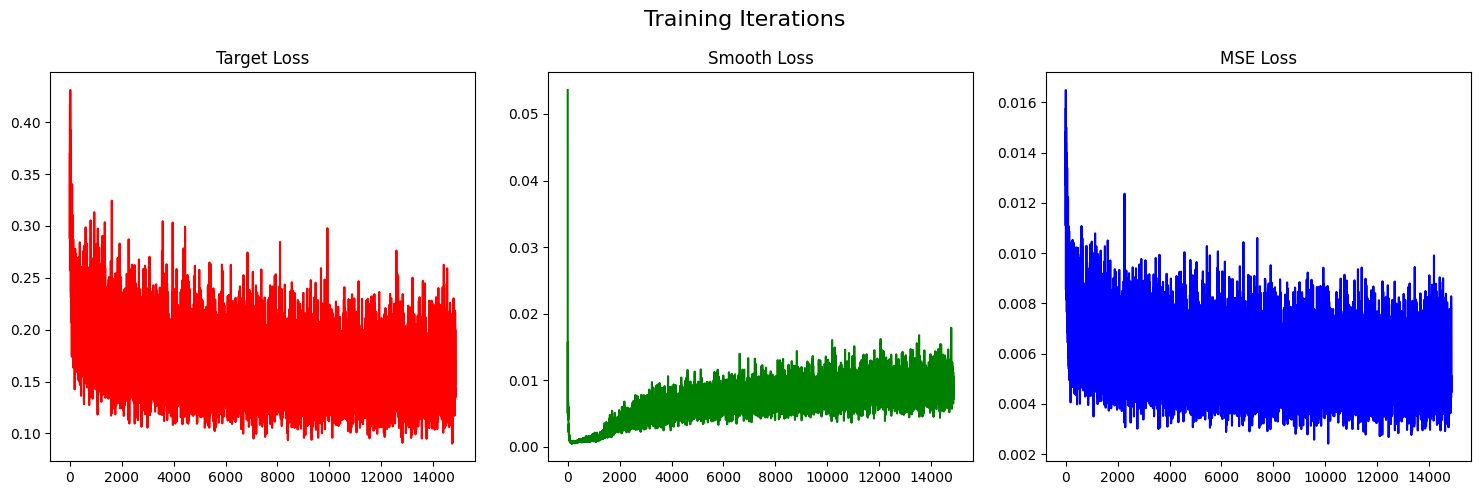

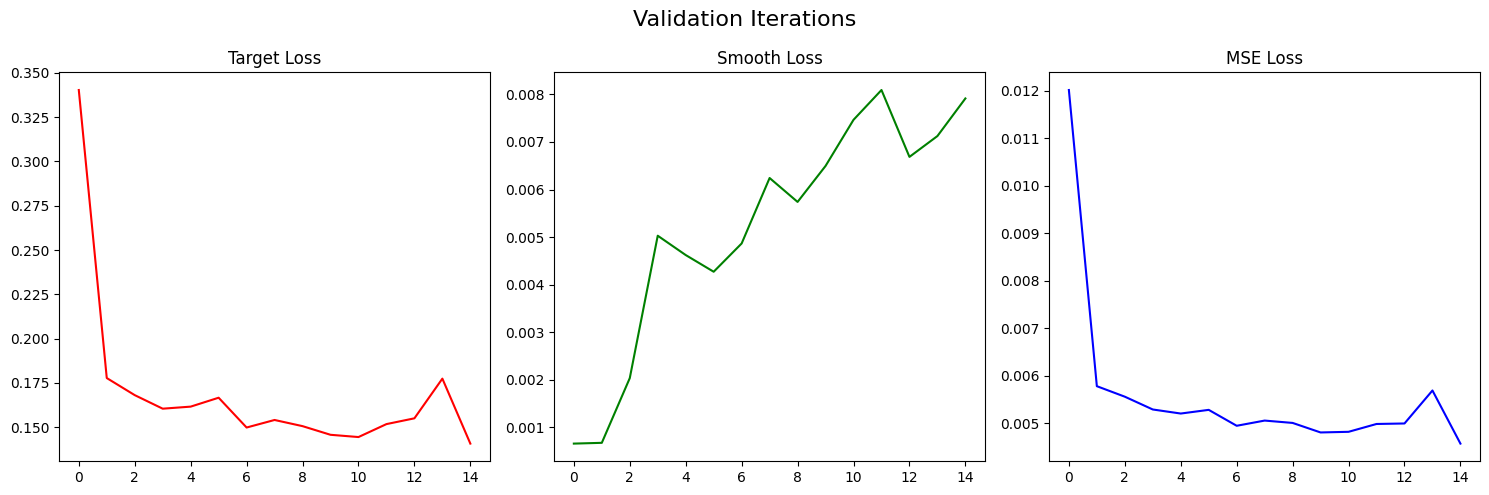

  0%|          | 0/14857 [00:00<?, ?it/s]

[1][0/14857]: [train] [target loss]: 0.12756521999835968 [smooth loss]: 0.008703351020812988 [mse]: 0.004234033454535841


  0%|          | 2/14857 [00:09<16:44:21,  4.06s/it]

[1][0/14857]: [val] [target loss]: 0.14630296755582095 [smooth loss]: 0.00776275247335434 [mse]: 0.004877246507436256


  3%|▎         | 502/14857 [00:39<14:27, 16.54it/s] 

[1][500/14857]: [train] [target loss]: 0.1084541529417038 [smooth loss]: 0.00617605447769165 [mse]: 0.003641108200737849


  7%|▋         | 1000/14857 [01:10<13:17, 17.37it/s]

[1][1000/14857]: [train] [target loss]: 0.15633895993232727 [smooth loss]: 0.010575950145721436 [mse]: 0.004823318305967272


  7%|▋         | 1002/14857 [01:18<5:17:35,  1.38s/it]

[1][1000/14857]: [val] [target loss]: 0.14175464887171985 [smooth loss]: 0.007540505230426788 [mse]: 0.004693422148421124


 10%|█         | 1502/14857 [01:50<15:26, 14.41it/s]  

[1][1500/14857]: [train] [target loss]: 0.15856042504310608 [smooth loss]: 0.013805389404296875 [mse]: 0.005295524828534438


 13%|█▎        | 2000/14857 [02:22<12:48, 16.72it/s]

[1][2000/14857]: [train] [target loss]: 0.17542661726474762 [smooth loss]: 0.01035308837890625 [mse]: 0.007052298315831017


 13%|█▎        | 2002/14857 [02:30<4:55:28,  1.38s/it]

[1][2000/14857]: [val] [target loss]: 0.1413548083603382 [smooth loss]: 0.0077234068512916565 [mse]: 0.004565543082968132


 17%|█▋        | 2504/14857 [03:03<13:17, 15.50it/s]  

[1][2500/14857]: [train] [target loss]: 0.15403886139392853 [smooth loss]: 0.011862993240356445 [mse]: 0.006404101306441242


 20%|██        | 3000/14857 [03:35<13:24, 14.74it/s]

[1][3000/14857]: [train] [target loss]: 0.168476864695549 [smooth loss]: 0.011063039302825928 [mse]: 0.0048366294120989846


 20%|██        | 3002/14857 [03:44<4:44:26,  1.44s/it]

[1][3000/14857]: [val] [target loss]: 0.14869857873767614 [smooth loss]: 0.008140391409397126 [mse]: 0.004761860742943253


 24%|██▎       | 3502/14857 [04:18<12:34, 15.05it/s]  

[1][3500/14857]: [train] [target loss]: 0.15249840915203094 [smooth loss]: 0.008819580078125 [mse]: 0.005610652851120425


 27%|██▋       | 4000/14857 [04:52<12:06, 14.94it/s]

[1][4000/14857]: [train] [target loss]: 0.1296536773443222 [smooth loss]: 0.00815582275390625 [mse]: 0.0035559566340845027


 27%|██▋       | 4002/14857 [05:01<4:18:05,  1.43s/it]

[1][4000/14857]: [val] [target loss]: 0.13633724849671125 [smooth loss]: 0.008050206303596496 [mse]: 0.004480155699291949


 30%|███       | 4504/14857 [05:33<11:11, 15.43it/s]  

[1][4500/14857]: [train] [target loss]: 0.1436329334974289 [smooth loss]: 0.011342942714691162 [mse]: 0.004691231029108407


 34%|███▎      | 5000/14857 [06:06<11:47, 13.93it/s]

[1][5000/14857]: [train] [target loss]: 0.15640239417552948 [smooth loss]: 0.009807884693145752 [mse]: 0.00585510703468279


 34%|███▎      | 5002/14857 [06:16<4:07:50,  1.51s/it]

[1][5000/14857]: [val] [target loss]: 0.14578213319182395 [smooth loss]: 0.009801385402679443 [mse]: 0.004828885931886191


 37%|███▋      | 5504/14857 [06:49<09:58, 15.64it/s]  

[1][5500/14857]: [train] [target loss]: 0.1314632147550583 [smooth loss]: 0.0100899338722229 [mse]: 0.004020338914954423


 40%|████      | 6000/14857 [07:21<09:18, 15.86it/s]

[1][6000/14857]: [train] [target loss]: 0.1984594613313675 [smooth loss]: 0.011279702186584473 [mse]: 0.006689393328282504


 40%|████      | 6002/14857 [07:31<3:37:17,  1.47s/it]

[1][6000/14857]: [val] [target loss]: 0.14247148916125296 [smooth loss]: 0.00938489317893982 [mse]: 0.004675131429951582


 44%|████▍     | 6502/14857 [08:04<09:28, 14.71it/s]  

[1][6500/14857]: [train] [target loss]: 0.19255641102790833 [smooth loss]: 0.010341823101043701 [mse]: 0.007286280424929873


 47%|████▋     | 7000/14857 [08:39<08:58, 14.60it/s]

[1][7000/14857]: [train] [target loss]: 0.14018553495407104 [smooth loss]: 0.00919961929321289 [mse]: 0.004828474747136644


 47%|████▋     | 7002/14857 [08:48<3:21:37,  1.54s/it]

[1][7000/14857]: [val] [target loss]: 0.13569648131728174 [smooth loss]: 0.008387189507484436 [mse]: 0.004443697770754186


 50%|█████     | 7502/14857 [09:21<07:44, 15.84it/s]  

[1][7500/14857]: [train] [target loss]: 0.1774166077375412 [smooth loss]: 0.012343049049377441 [mse]: 0.006197507543689714


 54%|█████▍    | 8000/14857 [09:54<07:31, 15.20it/s]

[1][8000/14857]: [train] [target loss]: 0.11836295574903488 [smooth loss]: 0.01197052001953125 [mse]: 0.0038343969576701696


 54%|█████▍    | 8002/14857 [10:03<2:41:56,  1.42s/it]

[1][8000/14857]: [val] [target loss]: 0.14278847586363555 [smooth loss]: 0.007908248007297516 [mse]: 0.004710274357010349


 57%|█████▋    | 8502/14857 [10:37<07:08, 14.82it/s]  

[1][8500/14857]: [train] [target loss]: 0.12433219701051712 [smooth loss]: 0.009078025817871094 [mse]: 0.004310626527357538


 61%|██████    | 9000/14857 [11:10<06:15, 15.59it/s]

[1][9000/14857]: [train] [target loss]: 0.1624559760093689 [smooth loss]: 0.008252918720245361 [mse]: 0.006243281740247742


 61%|██████    | 9002/14857 [11:20<2:19:41,  1.43s/it]

[1][9000/14857]: [val] [target loss]: 0.14179135203361512 [smooth loss]: 0.00804876685142517 [mse]: 0.004660020053190155


 64%|██████▍   | 9504/14857 [11:53<06:00, 14.83it/s]  

[1][9500/14857]: [train] [target loss]: 0.15784314274787903 [smooth loss]: 0.010040819644927979 [mse]: 0.006672340077467941


 67%|██████▋   | 10000/14857 [12:27<05:31, 14.66it/s]

[1][10000/14857]: [train] [target loss]: 0.1720505952835083 [smooth loss]: 0.010467708110809326 [mse]: 0.005565362003895901


 67%|██████▋   | 10002/14857 [12:36<1:59:46,  1.48s/it]

[1][10000/14857]: [val] [target loss]: 0.13835903096944094 [smooth loss]: 0.008230414986610413 [mse]: 0.004626446443729188


 71%|███████   | 10504/14857 [13:09<04:37, 15.70it/s]  

[1][10500/14857]: [train] [target loss]: 0.15075524151325226 [smooth loss]: 0.010615944862365723 [mse]: 0.005525685635083688


 74%|███████▍  | 11000/14857 [13:42<04:14, 15.17it/s]

[1][11000/14857]: [train] [target loss]: 0.12040991336107254 [smooth loss]: 0.009259521961212158 [mse]: 0.004352451599653289


 74%|███████▍  | 11002/14857 [13:51<1:31:55,  1.43s/it]

[1][11000/14857]: [val] [target loss]: 0.13919669024646283 [smooth loss]: 0.010239903330802918 [mse]: 0.004496870128530606


 77%|███████▋  | 11504/14857 [14:24<03:32, 15.75it/s]  

[1][11500/14857]: [train] [target loss]: 0.1550031155347824 [smooth loss]: 0.012263655662536621 [mse]: 0.004299233131268652


 81%|████████  | 12000/14857 [14:56<03:01, 15.71it/s]

[1][12000/14857]: [train] [target loss]: 0.13615845143795013 [smooth loss]: 0.006779134273529053 [mse]: 0.004596109691167686


 81%|████████  | 12002/14857 [15:05<1:06:45,  1.40s/it]

[1][12000/14857]: [val] [target loss]: 0.1444342064484954 [smooth loss]: 0.009665789008140564 [mse]: 0.004705595190525968


 84%|████████▍ | 12502/14857 [15:39<02:36, 15.04it/s]  

[1][12500/14857]: [train] [target loss]: 0.1429274082183838 [smooth loss]: 0.011936485767364502 [mse]: 0.00452225279580971


 87%|████████▋ | 12999/14857 [16:16<02:28, 12.51it/s]

[1][13000/14857]: [train] [target loss]: 0.13969510793685913 [smooth loss]: 0.009682118892669678 [mse]: 0.004864732732829659


 88%|████████▊ | 13002/14857 [16:28<47:12,  1.53s/it]

[1][13000/14857]: [val] [target loss]: 0.14096425320953132 [smooth loss]: 0.009730283319950104 [mse]: 0.004671059574715645


 91%|█████████ | 13502/14857 [17:07<01:47, 12.65it/s]

[1][13500/14857]: [train] [target loss]: 0.11956867575645447 [smooth loss]: 0.009872198104858398 [mse]: 0.003995348796071978


 94%|█████████▍| 14000/14857 [17:46<01:04, 13.23it/s]

[1][14000/14857]: [train] [target loss]: 0.13456496596336365 [smooth loss]: 0.009912192821502686 [mse]: 0.004124654258993962


 94%|█████████▍| 14002/14857 [17:58<26:16,  1.84s/it]

[1][14000/14857]: [val] [target loss]: 0.1438835682347417 [smooth loss]: 0.007672427594661713 [mse]: 0.004652612940623742


 98%|█████████▊| 14503/14857 [18:36<00:23, 14.76it/s]

[1][14500/14857]: [train] [target loss]: 0.12677323818206787 [smooth loss]: 0.010894954204559326 [mse]: 0.004396097975330457


100%|██████████| 14857/14857 [19:01<00:00, 13.02it/s]


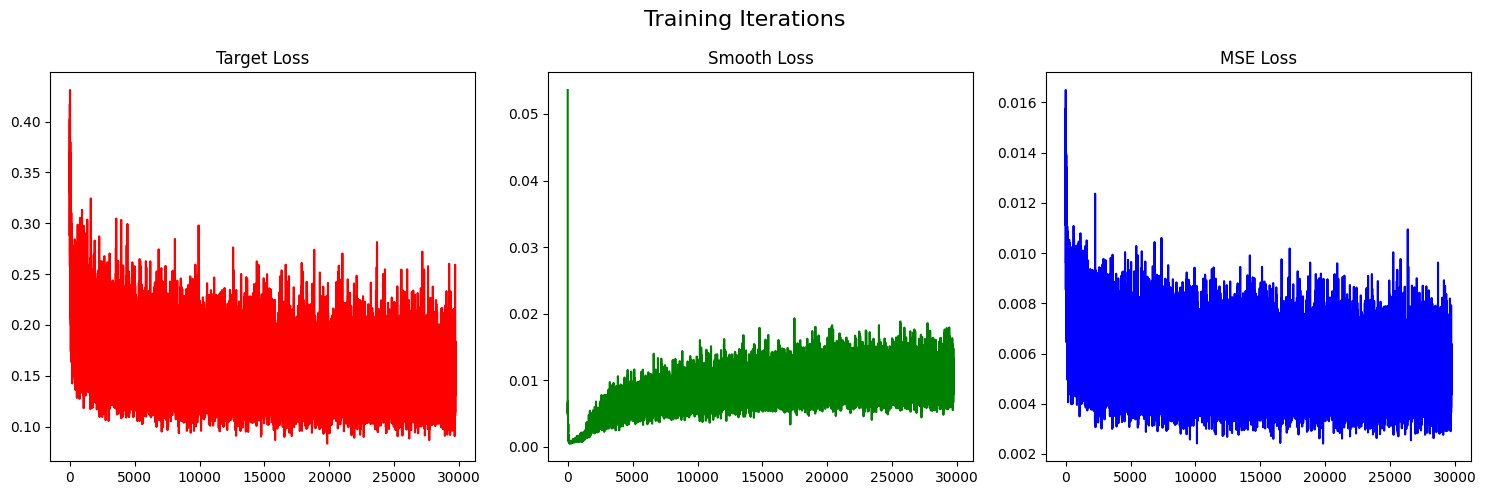

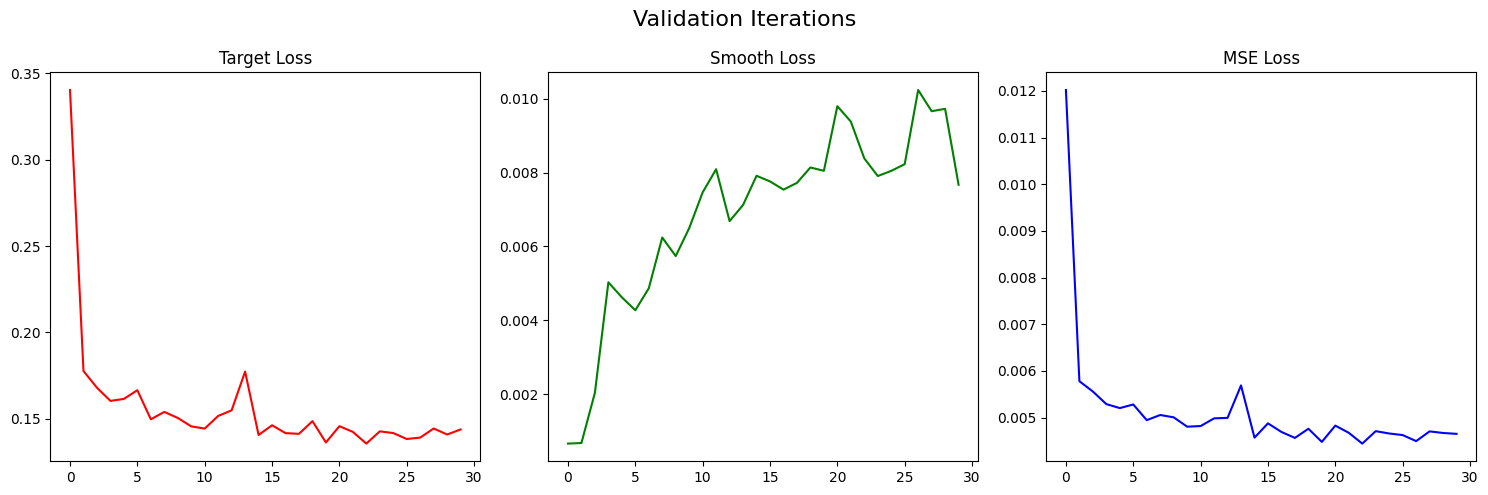

  0%|          | 0/14857 [00:00<?, ?it/s]

[2][0/14857]: [train] [target loss]: 0.1266724020242691 [smooth loss]: 0.011985957622528076 [mse]: 0.0034463490794820186


  0%|          | 2/14857 [00:10<17:13:47,  4.18s/it]

[2][0/14857]: [val] [target loss]: 0.13900923542678356 [smooth loss]: 0.009815607070922851 [mse]: 0.00464722523507263


  3%|▎         | 502/14857 [00:43<16:06, 14.85it/s] 

[2][500/14857]: [train] [target loss]: 0.14325053989887238 [smooth loss]: 0.010730743408203125 [mse]: 0.005011695386936006


  7%|▋         | 1000/14857 [01:14<14:14, 16.21it/s]

[2][1000/14857]: [train] [target loss]: 0.15718667209148407 [smooth loss]: 0.009191751480102539 [mse]: 0.005646588740703666


  7%|▋         | 1002/14857 [01:23<5:18:47,  1.38s/it]

[2][1000/14857]: [val] [target loss]: 0.14216639418154955 [smooth loss]: 0.0078590989112854 [mse]: 0.004630081627321841


 10%|█         | 1504/14857 [01:55<13:36, 16.36it/s]  

[2][1500/14857]: [train] [target loss]: 0.11911928653717041 [smooth loss]: 0.01139146089553833 [mse]: 0.003838842998597896


 13%|█▎        | 2000/14857 [02:25<13:04, 16.39it/s]

[2][2000/14857]: [train] [target loss]: 0.1372063010931015 [smooth loss]: 0.007470905780792236 [mse]: 0.005354593810716108


 13%|█▎        | 2002/14857 [02:35<5:05:23,  1.43s/it]

[2][2000/14857]: [val] [target loss]: 0.13621561016887426 [smooth loss]: 0.010713963210582734 [mse]: 0.004445146849647503


 17%|█▋        | 2504/14857 [03:08<13:17, 15.49it/s]  

[2][2500/14857]: [train] [target loss]: 0.14125779271125793 [smooth loss]: 0.010261833667755127 [mse]: 0.004969384359492792


 20%|██        | 3000/14857 [03:40<12:29, 15.81it/s]

[2][3000/14857]: [train] [target loss]: 0.15236885845661163 [smooth loss]: 0.010403931140899658 [mse]: 0.005253798704095212


 20%|██        | 3002/14857 [03:49<4:48:03,  1.46s/it]

[2][3000/14857]: [val] [target loss]: 0.13795242831110954 [smooth loss]: 0.008680260479450226 [mse]: 0.004521371405296902


 24%|██▎       | 3504/14857 [04:22<11:50, 15.99it/s]  

[2][3500/14857]: [train] [target loss]: 0.1654270589351654 [smooth loss]: 0.017359018325805664 [mse]: 0.005190789858354877


 27%|██▋       | 4000/14857 [04:55<12:37, 14.34it/s]

[2][4000/14857]: [train] [target loss]: 0.1291789561510086 [smooth loss]: 0.011666595935821533 [mse]: 0.004550646547332723


 27%|██▋       | 4002/14857 [05:05<4:47:31,  1.59s/it]

[2][4000/14857]: [val] [target loss]: 0.1442789101600647 [smooth loss]: 0.009995390474796296 [mse]: 0.004681914313379448


 30%|███       | 4503/14857 [05:42<12:33, 13.75it/s]  

[2][4500/14857]: [train] [target loss]: 0.15419253706932068 [smooth loss]: 0.01471257209777832 [mse]: 0.004610705950913072


 34%|███▎      | 4999/14857 [06:18<12:32, 13.10it/s]

[2][5000/14857]: [train] [target loss]: 0.14276959002017975 [smooth loss]: 0.013090848922729492 [mse]: 0.004981534079674271


 34%|███▎      | 5002/14857 [06:29<3:44:05,  1.36s/it]

[2][5000/14857]: [val] [target loss]: 0.13615162078291176 [smooth loss]: 0.010132224261760713 [mse]: 0.004515566679278897


 37%|███▋      | 5504/14857 [07:05<10:59, 14.19it/s]  

[2][5500/14857]: [train] [target loss]: 0.1345122903585434 [smooth loss]: 0.011144578456878662 [mse]: 0.004655616526037025


 40%|████      | 6000/14857 [07:41<10:32, 14.00it/s]

[2][6000/14857]: [train] [target loss]: 0.14591757953166962 [smooth loss]: 0.010223567485809326 [mse]: 0.0049876092262675295


 40%|████      | 6002/14857 [07:51<3:53:22,  1.58s/it]

[2][6000/14857]: [val] [target loss]: 0.13593542713671922 [smooth loss]: 0.009958982169628143 [mse]: 0.004495060322064465


 44%|████▍     | 6503/14857 [08:27<10:05, 13.80it/s]  

[2][6500/14857]: [train] [target loss]: 0.15088097751140594 [smooth loss]: 0.010668277740478516 [mse]: 0.004924102837273572


 47%|████▋     | 6999/14857 [09:06<10:49, 12.10it/s]

[2][7000/14857]: [train] [target loss]: 0.16198070347309113 [smooth loss]: 0.009437322616577148 [mse]: 0.006317870382546581


 47%|████▋     | 7002/14857 [09:18<3:17:28,  1.51s/it]

[2][7000/14857]: [val] [target loss]: 0.14811943277716635 [smooth loss]: 0.007696519792079926 [mse]: 0.004781131647121721


 50%|█████     | 7502/14857 [09:56<09:14, 13.27it/s]  

[2][7500/14857]: [train] [target loss]: 0.16302722692489624 [smooth loss]: 0.01000601053237915 [mse]: 0.005647403945416588


 54%|█████▍    | 8000/14857 [10:35<08:51, 12.89it/s]

[2][8000/14857]: [train] [target loss]: 0.16289623081684113 [smooth loss]: 0.012425363063812256 [mse]: 0.006507396363740855


 54%|█████▍    | 8002/14857 [10:45<3:02:14,  1.60s/it]

[2][8000/14857]: [val] [target loss]: 0.13880018960684537 [smooth loss]: 0.012442930042743683 [mse]: 0.004561463759326795


 57%|█████▋    | 8503/14857 [11:24<07:38, 13.85it/s]  

[2][8500/14857]: [train] [target loss]: 0.1293618083000183 [smooth loss]: 0.009930908679962158 [mse]: 0.0041775239403196145


 61%|██████    | 9000/14857 [12:01<07:13, 13.51it/s]

[2][9000/14857]: [train] [target loss]: 0.11848334968090057 [smooth loss]: 0.008952140808105469 [mse]: 0.004453820638165952


 61%|██████    | 9002/14857 [12:12<2:36:22,  1.60s/it]

[2][9000/14857]: [val] [target loss]: 0.14192996930330992 [smooth loss]: 0.007728164196014404 [mse]: 0.004652213131761394


 64%|██████▍   | 9502/14857 [12:51<08:09, 10.93it/s]  

[2][9500/14857]: [train] [target loss]: 0.14104953408241272 [smooth loss]: 0.011520564556121826 [mse]: 0.005732515967592845


 67%|██████▋   | 10000/14857 [13:33<05:57, 13.57it/s]

[2][10000/14857]: [train] [target loss]: 0.15519049763679504 [smooth loss]: 0.013307690620422363 [mse]: 0.00595937953249087


 67%|██████▋   | 10002/14857 [13:43<2:12:25,  1.64s/it]

[2][10000/14857]: [val] [target loss]: 0.14525795731693505 [smooth loss]: 0.012167890667915343 [mse]: 0.004662769772487942


 71%|███████   | 10502/14857 [14:23<05:25, 13.36it/s]  

[2][10500/14857]: [train] [target loss]: 0.14134937524795532 [smooth loss]: 0.008592724800109863 [mse]: 0.005969158605239318


 74%|███████▍  | 10999/14857 [15:09<05:30, 11.67it/s]

[2][11000/14857]: [train] [target loss]: 0.1448698341846466 [smooth loss]: 0.008073747158050537 [mse]: 0.006136512365283936


 74%|███████▍  | 11002/14857 [15:20<1:32:41,  1.44s/it]

[2][11000/14857]: [val] [target loss]: 0.13794601667672396 [smooth loss]: 0.008510918021202088 [mse]: 0.00460126903566337


 77%|███████▋  | 11502/14857 [16:01<04:13, 13.26it/s]  

[2][11500/14857]: [train] [target loss]: 0.19030922651290894 [smooth loss]: 0.010919809341430664 [mse]: 0.006821746263123077


 81%|████████  | 12000/14857 [16:38<03:32, 13.44it/s]

[2][12000/14857]: [train] [target loss]: 0.14986012876033783 [smooth loss]: 0.006485402584075928 [mse]: 0.005988109420940811


 81%|████████  | 12002/14857 [16:48<1:15:41,  1.59s/it]

[2][12000/14857]: [val] [target loss]: 0.14324126105755566 [smooth loss]: 0.008313252925872802 [mse]: 0.004690634842954092


 84%|████████▍ | 12502/14857 [17:27<02:58, 13.21it/s]  

[2][12500/14857]: [train] [target loss]: 0.12203157693147659 [smooth loss]: 0.011040747165679932 [mse]: 0.004310948235904129


 88%|████████▊ | 13000/14857 [18:08<03:03, 10.13it/s]

[2][13000/14857]: [train] [target loss]: 0.1087857112288475 [smooth loss]: 0.008608222007751465 [mse]: 0.0033914903578250036


 88%|████████▊ | 13002/14857 [18:19<1:02:08,  2.01s/it]

[2][13000/14857]: [val] [target loss]: 0.13553454633802176 [smooth loss]: 0.008592093288898468 [mse]: 0.004483274238974627


 91%|█████████ | 13502/14857 [18:58<01:35, 14.18it/s]  

[2][13500/14857]: [train] [target loss]: 0.14138810336589813 [smooth loss]: 0.009426534175872803 [mse]: 0.0044309186620679715


 94%|█████████▍| 14000/14857 [19:37<01:18, 10.85it/s]

[2][14000/14857]: [train] [target loss]: 0.12240757048130035 [smooth loss]: 0.013074219226837158 [mse]: 0.004154187111545784


 94%|█████████▍| 14002/14857 [19:48<24:56,  1.75s/it]

[2][14000/14857]: [val] [target loss]: 0.13818359296768903 [smooth loss]: 0.009846714437007903 [mse]: 0.004466072526429751


 98%|█████████▊| 14504/14857 [20:23<00:22, 15.83it/s]

[2][14500/14857]: [train] [target loss]: 0.13155338168144226 [smooth loss]: 0.010316193103790283 [mse]: 0.005084793203406424


100%|██████████| 14857/14857 [20:47<00:00, 11.91it/s]


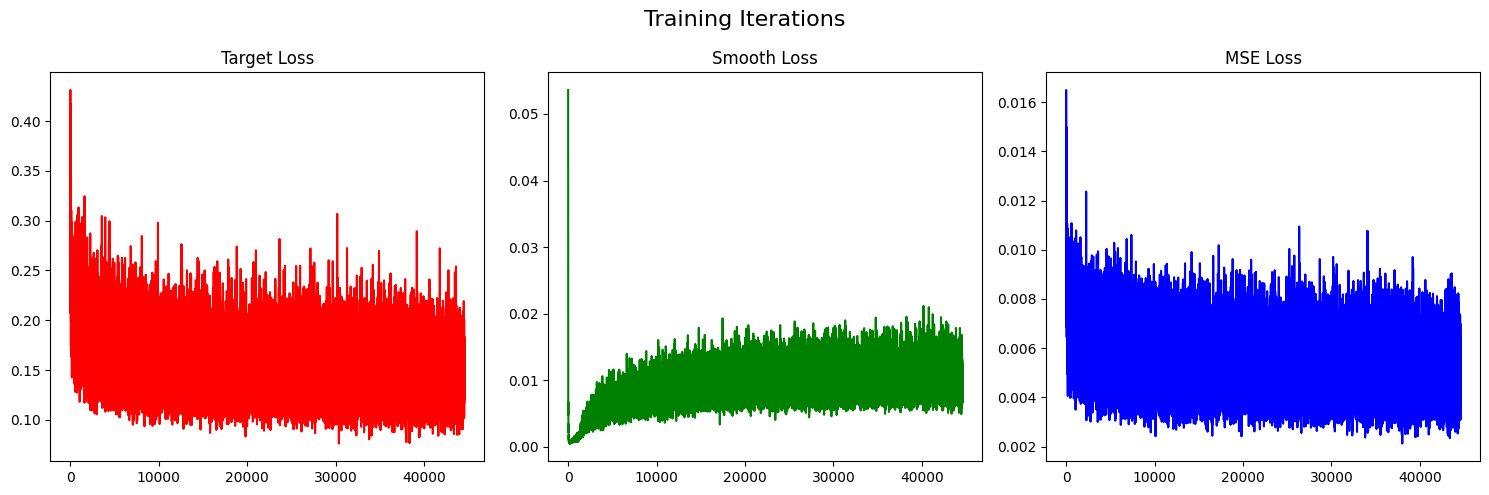

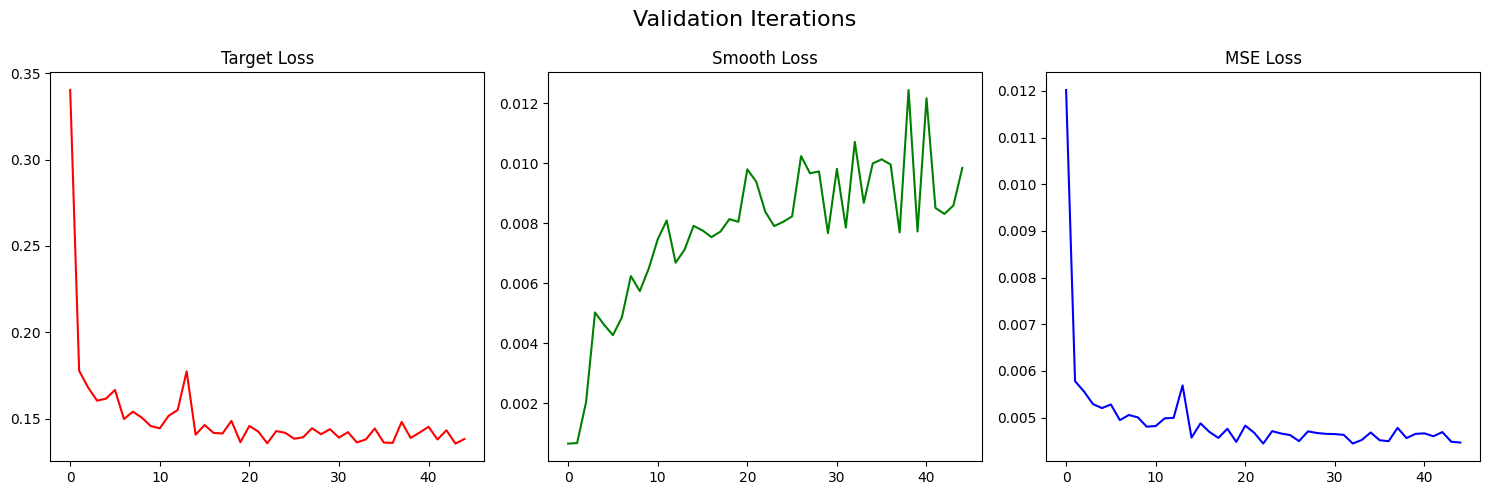

  0%|          | 0/14857 [00:00<?, ?it/s]

[3][0/14857]: [train] [target loss]: 0.13167455792427063 [smooth loss]: 0.01122283935546875 [mse]: 0.004437548362096101


  0%|          | 2/14857 [00:10<17:39:25,  4.28s/it]

[3][0/14857]: [val] [target loss]: 0.13655488561838866 [smooth loss]: 0.011719235479831695 [mse]: 0.004480107042604406


  3%|▎         | 502/14857 [00:47<17:23, 13.76it/s] 

[3][500/14857]: [train] [target loss]: 0.15266145765781403 [smooth loss]: 0.009585142135620117 [mse]: 0.0054267355061369295


  7%|▋         | 999/14857 [01:27<17:33, 13.15it/s]

[3][1000/14857]: [train] [target loss]: 0.1665511131286621 [smooth loss]: 0.012297749519348145 [mse]: 0.006241397858813849


  7%|▋         | 1002/14857 [01:37<5:13:27,  1.36s/it]

[3][1000/14857]: [val] [target loss]: 0.13070618301630021 [smooth loss]: 0.008423458933830261 [mse]: 0.004334241720832207


 10%|█         | 1502/14857 [02:17<18:51, 11.80it/s]  

[3][1500/14857]: [train] [target loss]: 0.14832507073879242 [smooth loss]: 0.008681058883666992 [mse]: 0.005687794202178433


 13%|█▎        | 2000/14857 [02:58<27:26,  7.81it/s]

[3][2000/14857]: [train] [target loss]: 0.08627810329198837 [smooth loss]: 0.010067403316497803 [mse]: 0.0025724376353035497


 13%|█▎        | 2002/14857 [03:08<6:24:48,  1.80s/it]

[3][2000/14857]: [val] [target loss]: 0.14094677165150643 [smooth loss]: 0.00953180193901062 [mse]: 0.004638085283884374


 17%|█▋        | 2503/14857 [03:47<13:58, 14.73it/s]  

[3][2500/14857]: [train] [target loss]: 0.13530489802360535 [smooth loss]: 0.010153651237487793 [mse]: 0.004412006605953839


 20%|██        | 2999/14857 [04:25<15:18, 12.90it/s]

[3][3000/14857]: [train] [target loss]: 0.10269816219806671 [smooth loss]: 0.011548459529876709 [mse]: 0.0035849445391234365


 20%|██        | 3002/14857 [04:36<4:29:43,  1.37s/it]

[3][3000/14857]: [val] [target loss]: 0.13416084695607425 [smooth loss]: 0.009493189454078675 [mse]: 0.004420685768774245


 24%|██▎       | 3504/14857 [05:09<11:54, 15.89it/s]  

[3][3500/14857]: [train] [target loss]: 0.1926901638507843 [smooth loss]: 0.008843719959259033 [mse]: 0.006877212629788666


 27%|██▋       | 4000/14857 [05:41<11:57, 15.14it/s]

[3][4000/14857]: [train] [target loss]: 0.19110366702079773 [smooth loss]: 0.010945141315460205 [mse]: 0.006292681937634668


 27%|██▋       | 4002/14857 [05:50<4:20:20,  1.44s/it]

[3][4000/14857]: [val] [target loss]: 0.13368549767881632 [smooth loss]: 0.008387468755245209 [mse]: 0.0044548515221476395


 30%|███       | 4504/14857 [06:23<11:17, 15.28it/s]  

[3][4500/14857]: [train] [target loss]: 0.142572283744812 [smooth loss]: 0.005343317985534668 [mse]: 0.004799534452934339


 34%|███▎      | 5000/14857 [06:56<10:42, 15.35it/s]

[3][5000/14857]: [train] [target loss]: 0.15046146512031555 [smooth loss]: 0.009304046630859375 [mse]: 0.004522229601469124


 34%|███▎      | 5002/14857 [07:05<3:54:11,  1.43s/it]

[3][5000/14857]: [val] [target loss]: 0.13754596762359142 [smooth loss]: 0.010593306124210358 [mse]: 0.004606313391817171


 37%|███▋      | 5502/14857 [07:36<09:56, 15.69it/s]  

[3][5500/14857]: [train] [target loss]: 0.1355435699224472 [smooth loss]: 0.009612441062927246 [mse]: 0.005351289301572308


 40%|████      | 6000/14857 [08:10<09:57, 14.82it/s]

[3][6000/14857]: [train] [target loss]: 0.15698914229869843 [smooth loss]: 0.0108642578125 [mse]: 0.005462723331327407


 40%|████      | 6002/14857 [08:19<3:32:12,  1.44s/it]

[3][6000/14857]: [val] [target loss]: 0.14442280661314727 [smooth loss]: 0.010618278980255127 [mse]: 0.004781532180561816


 44%|████▍     | 6504/14857 [08:53<09:34, 14.55it/s]  

[3][6500/14857]: [train] [target loss]: 0.1385389268398285 [smooth loss]: 0.014176428318023682 [mse]: 0.004933288420495464


 47%|████▋     | 7000/14857 [09:26<08:42, 15.04it/s]

[3][7000/14857]: [train] [target loss]: 0.14976447820663452 [smooth loss]: 0.013799488544464111 [mse]: 0.004909135662089725


 47%|████▋     | 7002/14857 [09:35<3:09:02,  1.44s/it]

[3][7000/14857]: [val] [target loss]: 0.1342994210869074 [smooth loss]: 0.009705997705459594 [mse]: 0.004481727463945594


 51%|█████     | 7504/14857 [10:09<08:09, 15.03it/s]  

[3][7500/14857]: [train] [target loss]: 0.1498345285654068 [smooth loss]: 0.013310849666595459 [mse]: 0.00486292953863182


 54%|█████▍    | 8000/14857 [10:42<07:32, 15.15it/s]

[3][8000/14857]: [train] [target loss]: 0.20581528544425964 [smooth loss]: 0.0129469633102417 [mse]: 0.006246698270245445


 54%|█████▍    | 8002/14857 [10:51<2:45:04,  1.44s/it]

[3][8000/14857]: [val] [target loss]: 0.13726159669458865 [smooth loss]: 0.009727104902267455 [mse]: 0.004479830451058815


 57%|█████▋    | 8504/14857 [11:24<06:49, 15.53it/s]  

[3][8500/14857]: [train] [target loss]: 0.14493820071220398 [smooth loss]: 0.012048184871673584 [mse]: 0.0055949170392176105


 61%|██████    | 9000/14857 [11:57<06:37, 14.72it/s]

[3][9000/14857]: [train] [target loss]: 0.1198219582438469 [smooth loss]: 0.01005321741104126 [mse]: 0.003672031353930802


 61%|██████    | 9002/14857 [12:07<2:22:10,  1.46s/it]

[3][9000/14857]: [val] [target loss]: 0.13253231916576624 [smooth loss]: 0.010471337139606476 [mse]: 0.0044042947501998645


 64%|██████▍   | 9504/14857 [12:41<06:00, 14.85it/s]  

[3][9500/14857]: [train] [target loss]: 0.18191315233707428 [smooth loss]: 0.00856083631515503 [mse]: 0.00552997784218716


 67%|██████▋   | 10000/14857 [13:14<05:06, 15.85it/s]

[3][10000/14857]: [train] [target loss]: 0.13915708661079407 [smooth loss]: 0.009795188903808594 [mse]: 0.005935012417930125


 67%|██████▋   | 10002/14857 [13:23<1:55:37,  1.43s/it]

[3][10000/14857]: [val] [target loss]: 0.13927359245717524 [smooth loss]: 0.008708102405071258 [mse]: 0.004535798146262644


 71%|███████   | 10502/14857 [13:57<05:01, 14.45it/s]  

[3][10500/14857]: [train] [target loss]: 0.08941055834293365 [smooth loss]: 0.007897794246673584 [mse]: 0.003304491819806971


 74%|███████▍  | 11000/14857 [14:30<04:10, 15.41it/s]

[3][11000/14857]: [train] [target loss]: 0.14835456013679504 [smooth loss]: 0.016247093677520752 [mse]: 0.005213322316318958


 74%|███████▍  | 11002/14857 [14:39<1:34:05,  1.46s/it]

[3][11000/14857]: [val] [target loss]: 0.1365440035238862 [smooth loss]: 0.009827797114849091 [mse]: 0.004543167693492216


 77%|███████▋  | 11504/14857 [15:12<03:36, 15.50it/s]  

[3][11500/14857]: [train] [target loss]: 0.12937434017658234 [smooth loss]: 0.011097609996795654 [mse]: 0.004403013227441246


 81%|████████  | 12000/14857 [15:45<03:24, 13.95it/s]

[3][12000/14857]: [train] [target loss]: 0.11456034332513809 [smooth loss]: 0.008213698863983154 [mse]: 0.0036297206006678444


 81%|████████  | 12002/14857 [15:55<1:09:39,  1.46s/it]

[3][12000/14857]: [val] [target loss]: 0.13623379588127135 [smooth loss]: 0.009028359055519105 [mse]: 0.0043896089777608885


 84%|████████▍ | 12502/14857 [16:30<02:45, 14.23it/s]  

[3][12500/14857]: [train] [target loss]: 0.12261147052049637 [smooth loss]: 0.012992024421691895 [mse]: 0.004166134505562204


 88%|████████▊ | 13000/14857 [17:04<02:08, 14.47it/s]

[3][13000/14857]: [train] [target loss]: 0.1113700419664383 [smooth loss]: 0.0061751604080200195 [mse]: 0.004150372585424608


 88%|████████▊ | 13002/14857 [17:14<45:05,  1.46s/it]

[3][13000/14857]: [val] [target loss]: 0.1378452279791236 [smooth loss]: 0.008086751699447631 [mse]: 0.004478114337911088


 91%|█████████ | 13504/14857 [17:47<01:31, 14.81it/s]

[3][13500/14857]: [train] [target loss]: 0.13911712169647217 [smooth loss]: 0.010147511959075928 [mse]: 0.0053451360558289225


 94%|█████████▍| 14000/14857 [18:21<00:55, 15.57it/s]

[3][14000/14857]: [train] [target loss]: 0.14983434975147247 [smooth loss]: 0.011119604110717773 [mse]: 0.005094362467785608


 94%|█████████▍| 14002/14857 [18:30<20:39,  1.45s/it]

[3][14000/14857]: [val] [target loss]: 0.1438859736919403 [smooth loss]: 0.010414107441902161 [mse]: 0.00471752133053321


 98%|█████████▊| 14504/14857 [19:05<00:23, 15.22it/s]

[3][14500/14857]: [train] [target loss]: 0.13643313944339752 [smooth loss]: 0.007677435874938965 [mse]: 0.004237096344360077


100%|██████████| 14857/14857 [19:29<00:00, 12.71it/s]


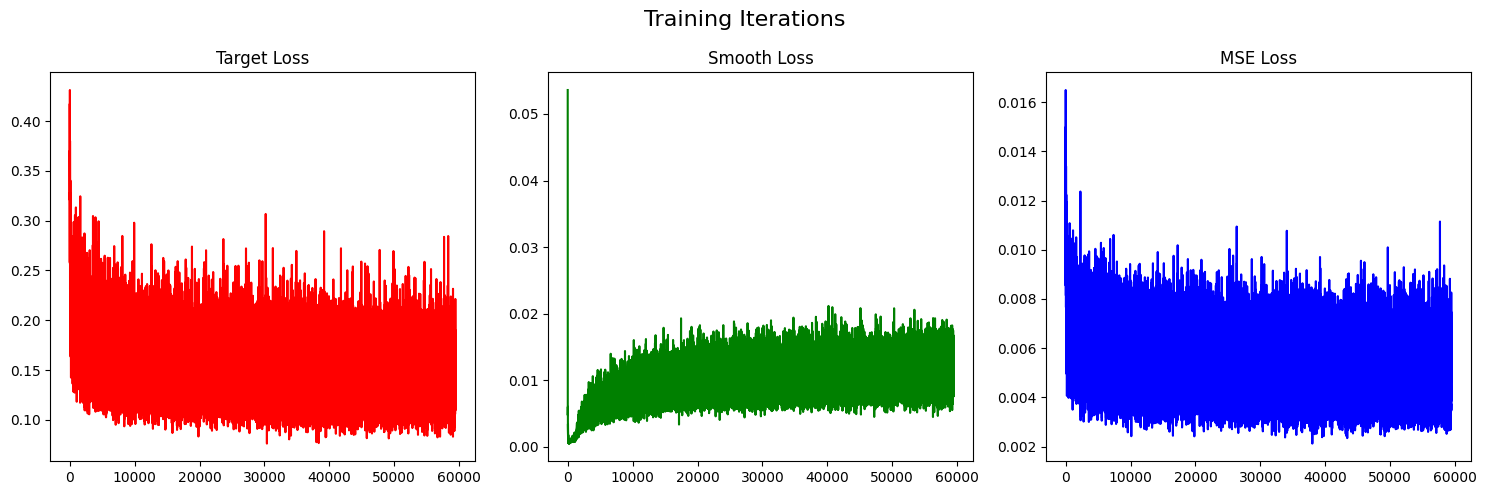

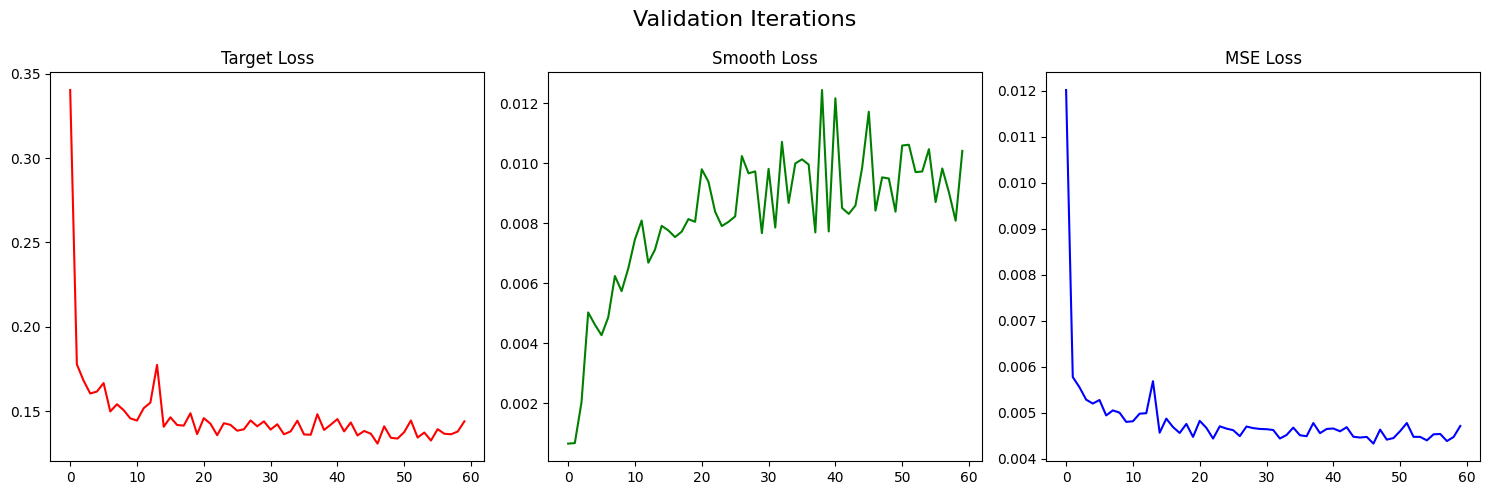

  0%|          | 0/14857 [00:00<?, ?it/s]

[4][0/14857]: [train] [target loss]: 0.13906720280647278 [smooth loss]: 0.01002800464630127 [mse]: 0.00559269343833306


  0%|          | 2/14857 [00:10<18:40:26,  4.53s/it]

[4][0/14857]: [val] [target loss]: 0.13634979754686355 [smooth loss]: 0.010255550146102905 [mse]: 0.0045460663401367075


  0%|          | 34/14857 [00:13<1:36:00,  2.57it/s]


KeyboardInterrupt: 

In [214]:
from tqdm import tqdm
num_epochs = 5
log_period = 500
val_period = 1000
val_size = 200
target_loss_function = torch.nn.HuberLoss()
smooth_loss_function = torch.nn.CosineSimilarity(dim=2)
mse_loss_function = torch.nn.MSELoss()
target_weight = 2.0
smooth_weight = 0.5

for epoch in range(num_epochs):
    for it, data in enumerate(tqdm(train_loader)):
        net.train()
        in_audio = data['audio']
        facial = data['facial']

        in_audio = in_audio.cuda()
        facial = facial.cuda()
        pre_frames = 4
        in_pre_face = facial.new_zeros((facial.shape[0], facial.shape[1], facial.shape[2] + 1)).cuda()
        in_pre_face[:, 0:pre_frames, :-1] = facial[:, 0:pre_frames]
        in_pre_face[:, 0:pre_frames, -1] = 1 
        
        optimizer.zero_grad()
        out_face = net(in_pre_face,in_audio)
        target_loss = target_loss_function(out_face, facial)
        smooth_loss = 1 - smooth_loss_function(out_face[:,:-1,:], out_face[:,1:,:]).mean()
        loss = target_weight * target_loss + smooth_weight * smooth_loss
        loss.backward()
        optimizer.step()

        train_target_loss.append(target_loss.item())
        train_smooth_loss.append(smooth_loss.item())
        train_mse_loss.append(mse_loss_function(out_face.cpu()*std_facial+mean_facial, facial.cpu()*std_facial+mean_facial).item())
        
        #logging
        if it % log_period == 0:
            print(f'[{epoch}][{it}/{len(train_loader)}]: [train] [target loss]: {train_target_loss[-1]} [smooth loss]: {train_smooth_loss[-1]} [mse]: {train_mse_loss[-1]}')
        
        if it % val_period == 0:
            net.eval()
            val_target_loss_st = []
            val_smooth_loss_st = []
            val_mse_loss_st = []
            val_cnt = 0
            
            for _, data in enumerate(val_loader):
                in_audio = data['audio']
                facial = data['facial']
                in_audio = in_audio.cuda()
                facial = facial.cuda()
                pre_frames = 4
                in_pre_face = facial.new_zeros((facial.shape[0], facial.shape[1], facial.shape[2] + 1)).cuda()
                in_pre_face[:, 0:pre_frames, :-1] = facial[:, 0:pre_frames]
                in_pre_face[:, 0:pre_frames, -1] = 1 

                out_face = net(in_pre_face,in_audio)
                target_loss = target_loss_function(out_face, facial)
                smooth_loss = 1 - smooth_loss_function(out_face[:,:-1,:], out_face[:,1:,:]).mean()

                val_target_loss_st.append(target_loss.item())
                val_smooth_loss_st.append(smooth_loss.item())
                val_mse_loss_st.append(mse_loss_function(out_face.cpu()*std_facial+mean_facial, facial.cpu()*std_facial+mean_facial).item())
                
                
                val_cnt += 1
                if val_cnt >= val_size:
                    break
            
            val_target_loss.append(np.average(val_target_loss_st))
            val_smooth_loss.append(np.average(val_smooth_loss_st))
            val_mse_loss.append(np.average(val_mse_loss_st))
            print(f'[{epoch}][{it}/{len(train_loader)}]: [val] [target loss]: {val_target_loss[-1]} [smooth loss]: {val_smooth_loss[-1]} [mse]: {val_mse_loss[-1]}')
    plot_train_val_loss()
        

In [215]:
torch.save(net.state_dict(), 'ckpt_model/simplenet2.pth')

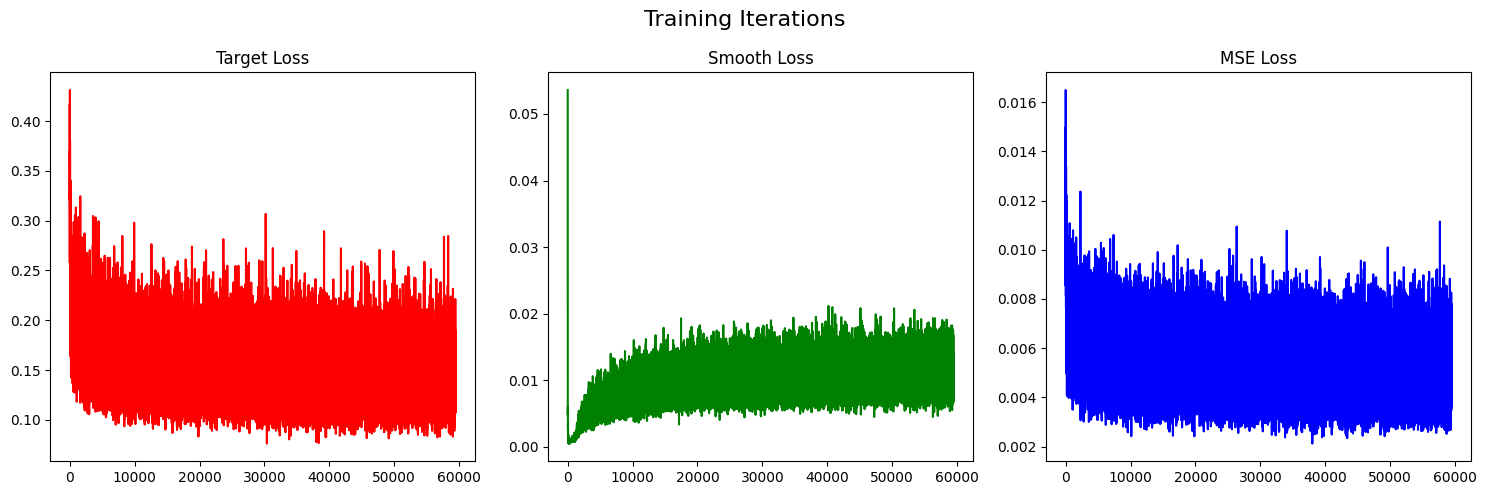

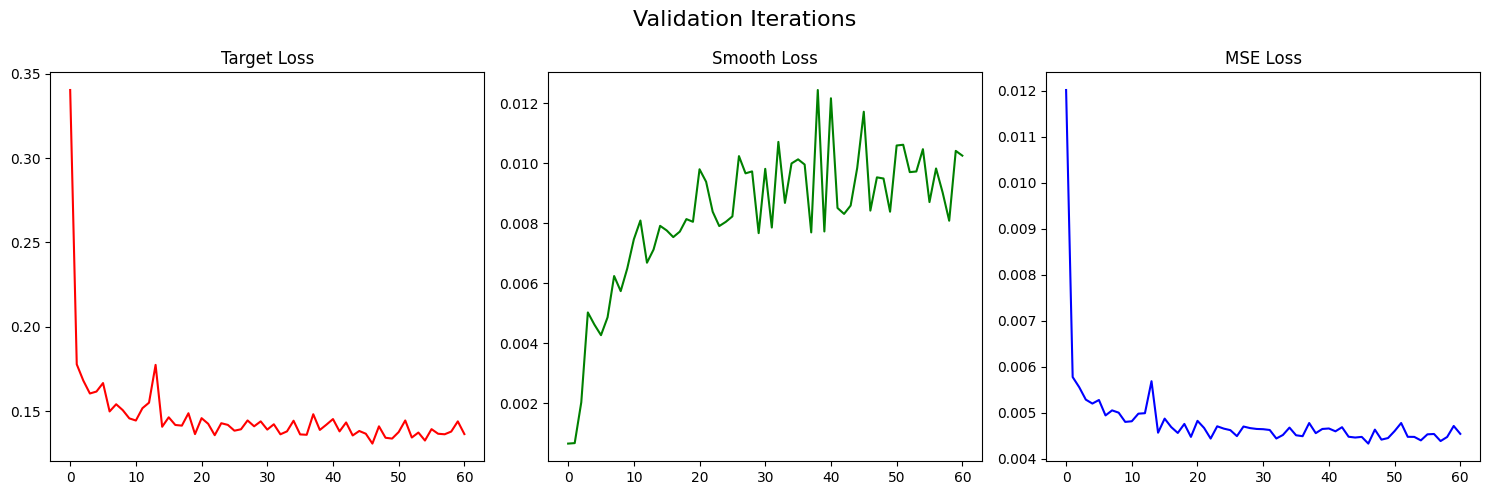

In [216]:
plot_train_val_loss()

### Testing

In [53]:
from pythonosc import udp_client
import time
import sounddevice as sd
import torch
from dataloaders.beat import CustomDataset
from dataloaders.build_vocab import Vocab
import pickle
import numpy as np

config_file = open("camn_config.obj", 'rb') 
args = pickle.load(config_file)
args.batch_size = 16

mean_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_mean.npy"))
std_facial = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.facial_rep}/json_std.npy"))
mean_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_mean.npy"))
std_audio = torch.from_numpy(np.load(args.root_path+args.mean_pose_path+f"{args.audio_rep}/npy_std.npy"))

In [54]:
test_data = CustomDataset(args, "test")
test_loader = torch.utils.data.DataLoader(
    test_data, 
    batch_size=1,  
    shuffle=True,  
    drop_last=False,
)

In [55]:
data = next(iter(test_loader))

In [56]:
facial = data["facial"]
audio = data["audio"]

In [57]:
out_facial = facial * std_facial + mean_facial
out_audio = audio * std_audio + mean_audio

In [58]:
# Try playing the audio, which is at 16KHZ
print(out_facial.min(), out_facial.max())
print(out_facial.std(), out_facial.mean())

tensor(-2.9796e-09, dtype=torch.float64) tensor(0.9348, dtype=torch.float64)
tensor(0.1275, dtype=torch.float64) tensor(0.1153, dtype=torch.float64)


In [59]:
out_audio.shape

torch.Size([1, 1280000])

In [60]:
blend =  [
        "browDownLeft",
        "browDownRight",
        "browInnerUp",
        "browOuterUpLeft",
        "browOuterUpRight",
        "cheekPuff",
        "cheekSquintLeft",
        "cheekSquintRight",
        "eyeBlinkLeft",
        "eyeBlinkRight",
        "eyeLookDownLeft",
        "eyeLookDownRight",
        "eyeLookInLeft",
        "eyeLookInRight",
        "eyeLookOutLeft",
        "eyeLookOutRight",
        "eyeLookUpLeft",
        "eyeLookUpRight",
        "eyeSquintLeft",
        "eyeSquintRight",
        "eyeWideLeft",
        "eyeWideRight",
        "jawForward",
        "jawLeft",
        "jawOpen",
        "jawRight",
        "mouthClose",
        "mouthDimpleLeft",
        "mouthDimpleRight",
        "mouthFrownLeft",
        "mouthFrownRight",
        "mouthFunnel",
        "mouthLeft",
        "mouthLowerDownLeft",
        "mouthLowerDownRight",
        "mouthPressLeft",
        "mouthPressRight",
        "mouthPucker",
        "mouthRight",
        "mouthRollLower",
        "mouthRollUpper",
        "mouthShrugLower",
        "mouthShrugUpper",
        "mouthSmileLeft",
        "mouthSmileRight",
        "mouthStretchLeft",
        "mouthStretchRight",
        "mouthUpperUpLeft",
        "mouthUpperUpRight",
        "noseSneerLeft",
        "noseSneerRight",
        "tongueOut"
    ]

In [61]:
def play_audio(out_audio, init_time):
    time.sleep(init_time - time.time())
    sd.play(out_audio, 16000)
    sd.wait()
    print("Audio finished:", time.time())

In [62]:

def send_udp(out_face, init_time):
    #outWeight = np.zeros(52)

    ##need to implement get value in
    outWeight = out_face

    outWeight = outWeight * (outWeight >= 0)

    client = udp_client.SimpleUDPClient('127.0.0.1', 5008)
    osc_array = outWeight.tolist()
    
    fps = 15
    time.sleep(init_time - time.time())
    #start_time = time.time()
    for i in range(len(osc_array)):
        #print(out_face[i].shape)
        for j, out in enumerate(osc_array[i]):
            client.send_message('/' + str(blend[j]), out)

        elpased_time = time.time() - init_time
        sleep_time = 1.0/fps * (i+1) - elpased_time
        if sleep_time > 0:
            time.sleep(sleep_time)
        #start_time = time.time()
    print("Facial finished:", time.time())

In [63]:
import threading

init_time = time.time() + 1

limit_sec = 20

udp_thread = threading.Thread(target=send_udp, args=(out_facial[0, 0:limit_sec*15],init_time))
udp_thread.daemon = True  # Set the thread as a daemon to allow it to exit when the main program exits

audio_thread = threading.Thread(target=play_audio, args=(out_audio[0, 0:limit_sec*16000],init_time))
audio_thread.daemon = True

udp_thread.start()
audio_thread.start()

udp_thread.join()
audio_thread.join()

Facial finished: 1714774922.9064744
Audio finished: 1714774923.2753785


In [64]:
print(len(out_audio[0])/16000, len(out_facial[0])/15)

80.0 80.0


In [65]:
 # load in model
from scripts.SimpleNet import FaceGenerator
model_path = 'ckpt_model/simplenet2.pth'
net = FaceGenerator()
net.load_state_dict(torch.load(model_path))
net = net.cuda().eval()

In [70]:
in_audio = audio.cuda()
in_facial = facial.cuda()
pre_frames = 4
in_pre_facial = in_facial.new_zeros((in_facial.shape[0], in_facial.shape[1]-14, in_facial.shape[2] + 1)).cuda() #-5 for now for temp bug fix
in_pre_facial[:, 0:pre_frames, :-1] = in_facial[:, 0:pre_frames]
in_pre_facial[:, 0:pre_frames, -1] = 1 

pred_facial = net(in_pre_facial,in_audio).cpu().detach()
pred_facial = np.array(pred_facial * std_facial + mean_facial)

In [71]:
print(pred_facial.min(), pred_facial.max())
print(pred_facial.std(), pred_facial.mean())

-0.03807661247076424 0.5013349444844808
0.101704154802832 0.11116724937119574


In [72]:
import threading

init_time = time.time() + 1

limit_sec = 30

udp_thread = threading.Thread(target=send_udp, args=(pred_facial[0,0:limit_sec*15],init_time))
udp_thread.daemon = True  # Set the thread as a daemon to allow it to exit when the main program exits

audio_thread = threading.Thread(target=play_audio, args=(out_audio[0,0:limit_sec*16000],init_time))
audio_thread.daemon = True

udp_thread.start()
audio_thread.start()

udp_thread.join()
audio_thread.join()

Facial finished: 1714775029.8794873
Audio finished: 1714775030.154047


In [74]:
print(torch.nn.functional.mse_loss(torch.from_numpy(pred_facial), out_facial[:,:-14,:]))

tensor(0.0118, dtype=torch.float64)
